## To predict diabetes using pima data

In [1]:
# importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# reading dataset
df = pd.read_csv('pima-data.csv')

In [3]:
df.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3790,True
1,1,85,66,29,0,26.6,0.351,31,1.1426,False
2,8,183,64,0,0,23.3,0.672,32,0.0000,True
3,1,89,66,23,94,28.1,0.167,21,0.9062,False
4,0,137,40,35,168,43.1,2.288,33,1.3790,True


### EDA

In [4]:
df.isnull().any()

num_preg        False
glucose_conc    False
diastolic_bp    False
thickness       False
insulin         False
bmi             False
diab_pred       False
age             False
skin            False
diabetes        False
dtype: bool

There are no null values but we can see there are some 0 values. <br> Lets check number of 0's in each feature

In [5]:
features = df.iloc[:,:-1].columns

In [6]:
print(f"Total number of records: {len(df)}")
for feature in features:
    print(f"Number of 0's in {feature}: {len(df.loc[df[feature] == 0])}")

Total number of records: 768
Number of 0's in num_preg: 111
Number of 0's in glucose_conc: 5
Number of 0's in diastolic_bp: 35
Number of 0's in thickness: 227
Number of 0's in insulin: 374
Number of 0's in bmi: 11
Number of 0's in diab_pred: 0
Number of 0's in age: 0
Number of 0's in skin: 227


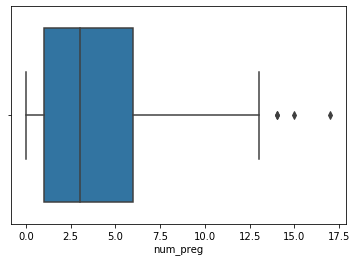

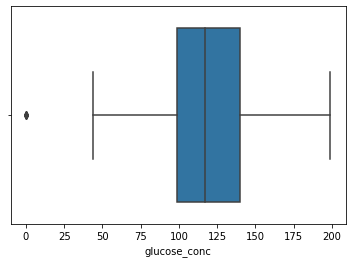

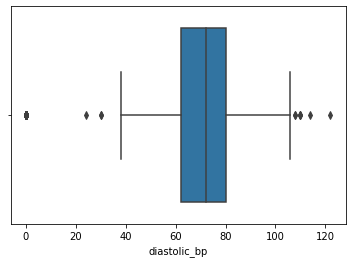

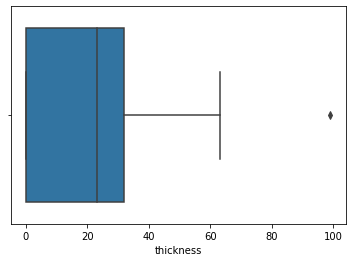

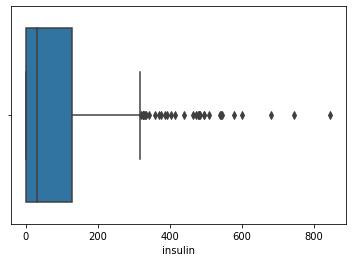

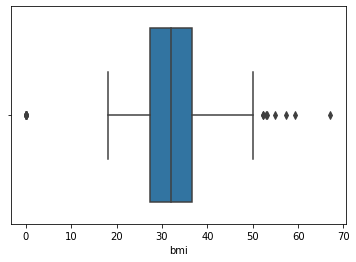

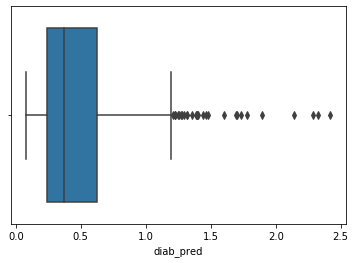

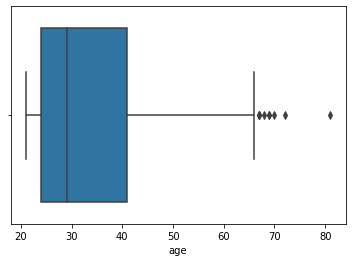

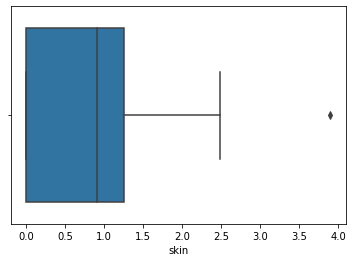

In [7]:
# lets check for outliers
for feature in features:
    sns.boxplot(x=df[feature], data=df)
    plt.show()

We can see there are outliers, so we will use Median to fill 0 values

Now, lets see correlation

In [8]:
corr = df.corr()
corr.diabetes.sort_values(ascending=False)

diabetes        1.000000
glucose_conc    0.466581
bmi             0.292695
age             0.238356
num_preg        0.221898
diab_pred       0.173844
insulin         0.130548
skin            0.074752
thickness       0.074752
diastolic_bp    0.065068
Name: diabetes, dtype: float64

### Feature Engineering

1. We will fill 0 values with median

In [9]:
for feature in features:
    median = df[feature].median()
    df[feature] = np.where(df[feature]==0, median, df[feature])

In [10]:
df.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6.0,148.0,72.0,35.0,30.5,33.6,0.627,50.0,1.3790,True
1,1.0,85.0,66.0,29.0,30.5,26.6,0.351,31.0,1.1426,False
2,8.0,183.0,64.0,23.0,30.5,23.3,0.672,32.0,0.9062,True
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0.9062,False
4,3.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1.3790,True


In [11]:
print(f"Total number of records: {len(df)}")
for feature in features:
    print(f"Number of 0's in {feature}: {len(df.loc[df[feature] == 0])}")

Total number of records: 768
Number of 0's in num_preg: 0
Number of 0's in glucose_conc: 0
Number of 0's in diastolic_bp: 0
Number of 0's in thickness: 0
Number of 0's in insulin: 0
Number of 0's in bmi: 0
Number of 0's in diab_pred: 0
Number of 0's in age: 0
Number of 0's in skin: 0


2. Dependent feature in categorical, lets make it boolean

In [12]:
data = {True:1, False:0}
df['diabetes'] = df['diabetes'].map(data)

In [13]:
df.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6.0,148.0,72.0,35.0,30.5,33.6,0.627,50.0,1.3790,1
1,1.0,85.0,66.0,29.0,30.5,26.6,0.351,31.0,1.1426,0
2,8.0,183.0,64.0,23.0,30.5,23.3,0.672,32.0,0.9062,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0.9062,0
4,3.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1.3790,1


### Train test split

In [14]:
# Independent and dependent features
X = df[features]
y = df["diabetes"]

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=10)

### Train model

In [16]:
# we will use Random Forest
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=10)

In [17]:
model.fit(X_train, y_train)

RandomForestClassifier(random_state=10)

### Predict

In [18]:
y_pred = model.predict(X_test)

### Accuracy

In [19]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [20]:
print("Accuracy score:",accuracy_score(y_test, y_pred))

Accuracy score: 0.7532467532467533
